# **Utilities**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
samp = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/samp_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/bank-test.csv')
train = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/bank-train.csv')

In [10]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
1,35451,31,admin.,married,university.degree,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
2,30592,59,retired,married,basic.4y,no,no,no,cellular,may,...,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
3,17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
4,3315,39,admin.,single,high.school,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0


In [11]:
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32884,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,9403,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


*The training data has the column 'duration', which indicates the duration of a call with the client. As we will not know the duration of a call before calling a client, this data is not included in our testing data. Because of this, we will remove it from the training set.*

*We can see that the training data has a column labeled 'y' with the result.
1 indicates a success (the client purchased the deposit), and 0 indicates a failure (the client did not purchase the depsoit).*

In [3]:
train.shape

(32950, 22)

In [4]:
train.describe

<bound method NDFrame.describe of           id  age          job   marital            education  default  \
0      12556   40  blue-collar   married             basic.9y  unknown   
1      35451   31       admin.   married    university.degree       no   
2      30592   59      retired   married             basic.4y       no   
3      17914   43    housemaid  divorced             basic.9y       no   
4       3315   39       admin.    single          high.school  unknown   
...      ...  ...          ...       ...                  ...      ...   
32945   6265   58      retired   married  professional.course  unknown   
32946  11284   37   management   married    university.degree       no   
32947  38158   35       admin.   married          high.school       no   
32948    860   40   management   married    university.degree       no   
32949  15795   29       admin.    single    university.degree       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0      

In [5]:
for col in test.columns:
    print('# of unknowns in ' + col + ': ' + str((test[col] == 'unknown').sum()))

# of unknowns in id: 0
# of unknowns in age: 0
# of unknowns in job: 68
# of unknowns in marital: 19
# of unknowns in education: 332
# of unknowns in default: 1740
# of unknowns in housing: 179
# of unknowns in loan: 179
# of unknowns in contact: 0
# of unknowns in month: 0
# of unknowns in day_of_week: 0
# of unknowns in duration: 0
# of unknowns in campaign: 0
# of unknowns in pdays: 0
# of unknowns in previous: 0
# of unknowns in poutcome: 0
# of unknowns in emp.var.rate: 0
# of unknowns in cons.price.idx: 0
# of unknowns in cons.conf.idx: 0
# of unknowns in euribor3m: 0
# of unknowns in nr.employed: 0


In [6]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
1,35451,31,admin.,married,university.degree,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
2,30592,59,retired,married,basic.4y,no,no,no,cellular,may,...,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
3,17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
4,3315,39,admin.,single,high.school,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0


In [7]:
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32884,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,9403,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [8]:
samp.head()

,id,Predicted
0,32884,0
1,3169,0
2,32206,0
3,9403,1
4,14020,1


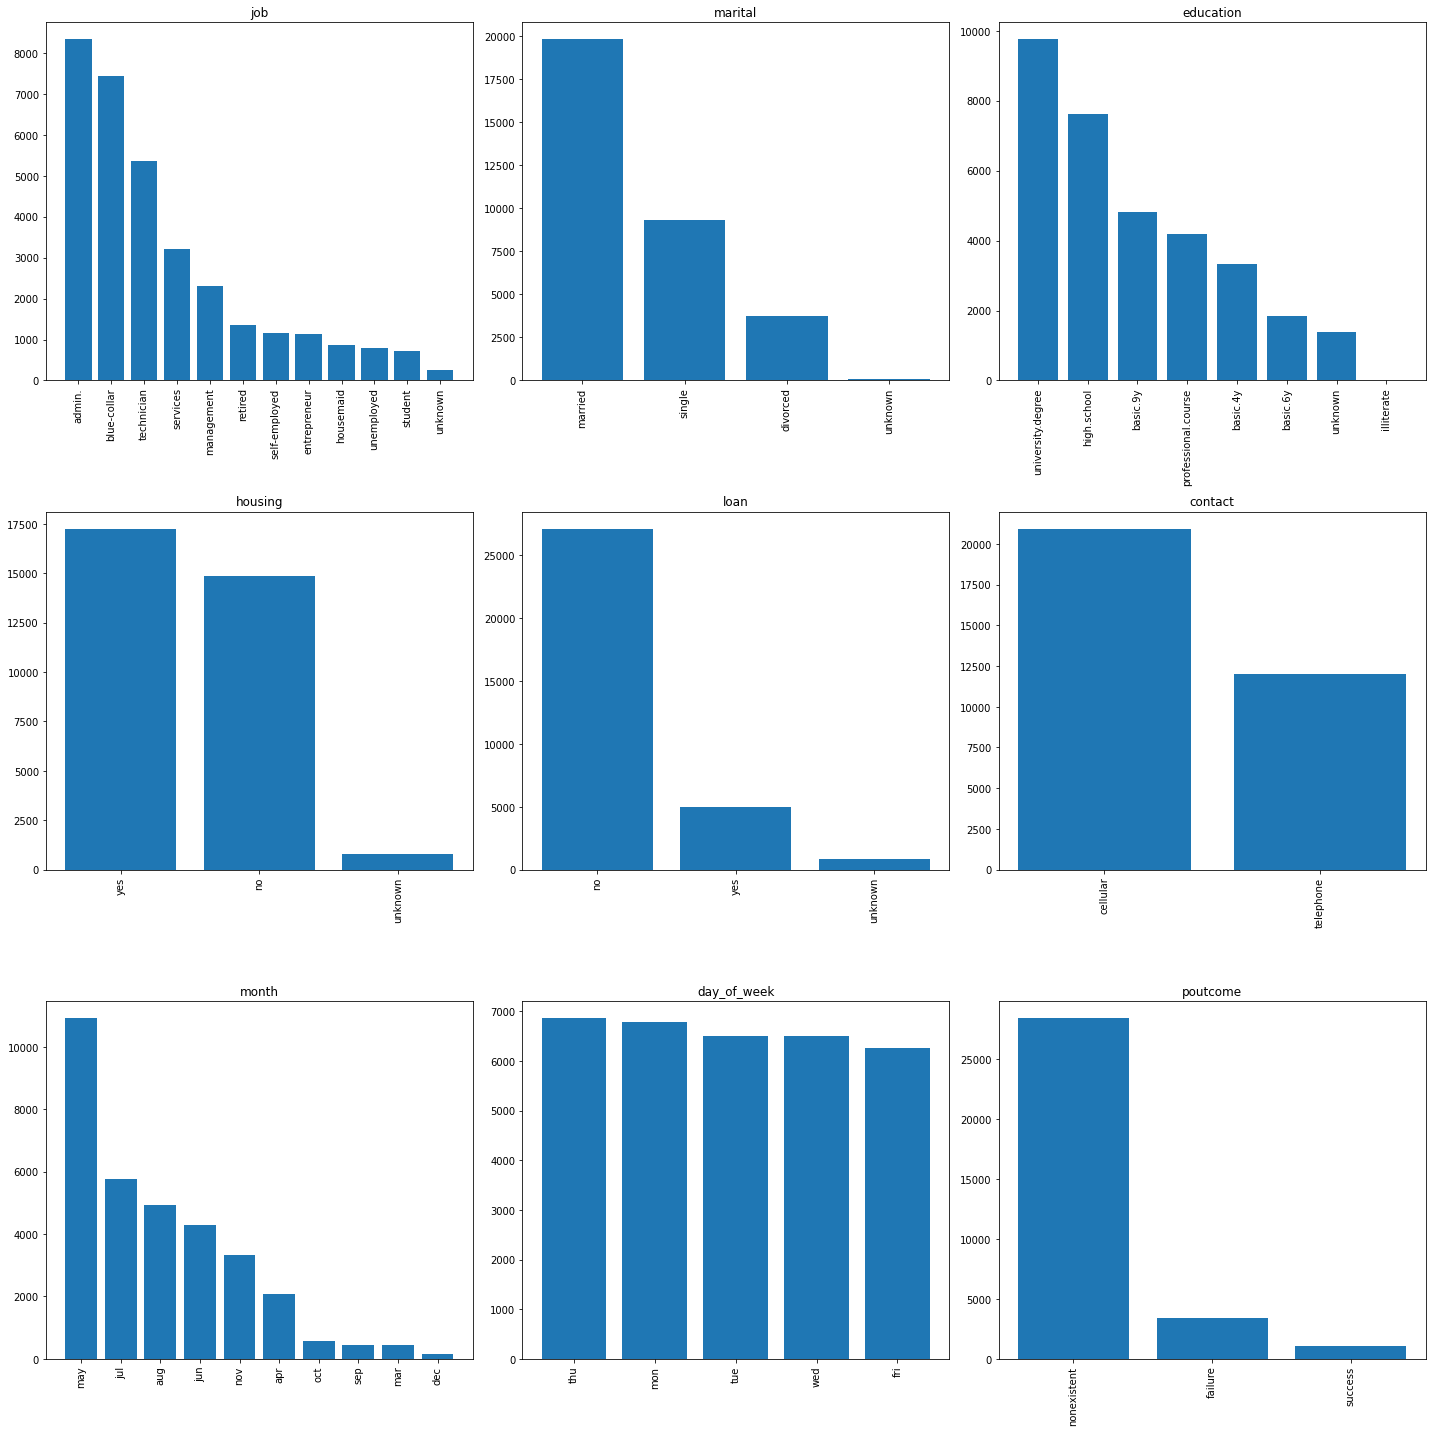

In [9]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
fig, ax = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (15, 15))
counter = 0
for column in categorical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    counts = train[column].value_counts()
    x_pos = np.arange(0, len(counts))
    ax[trace_x, trace_y].bar(x_pos, counts.values, tick_label = counts.index)
    ax[trace_x, trace_y].set_title(column)

    for tick in ax[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.tight_layout()
plt.show()

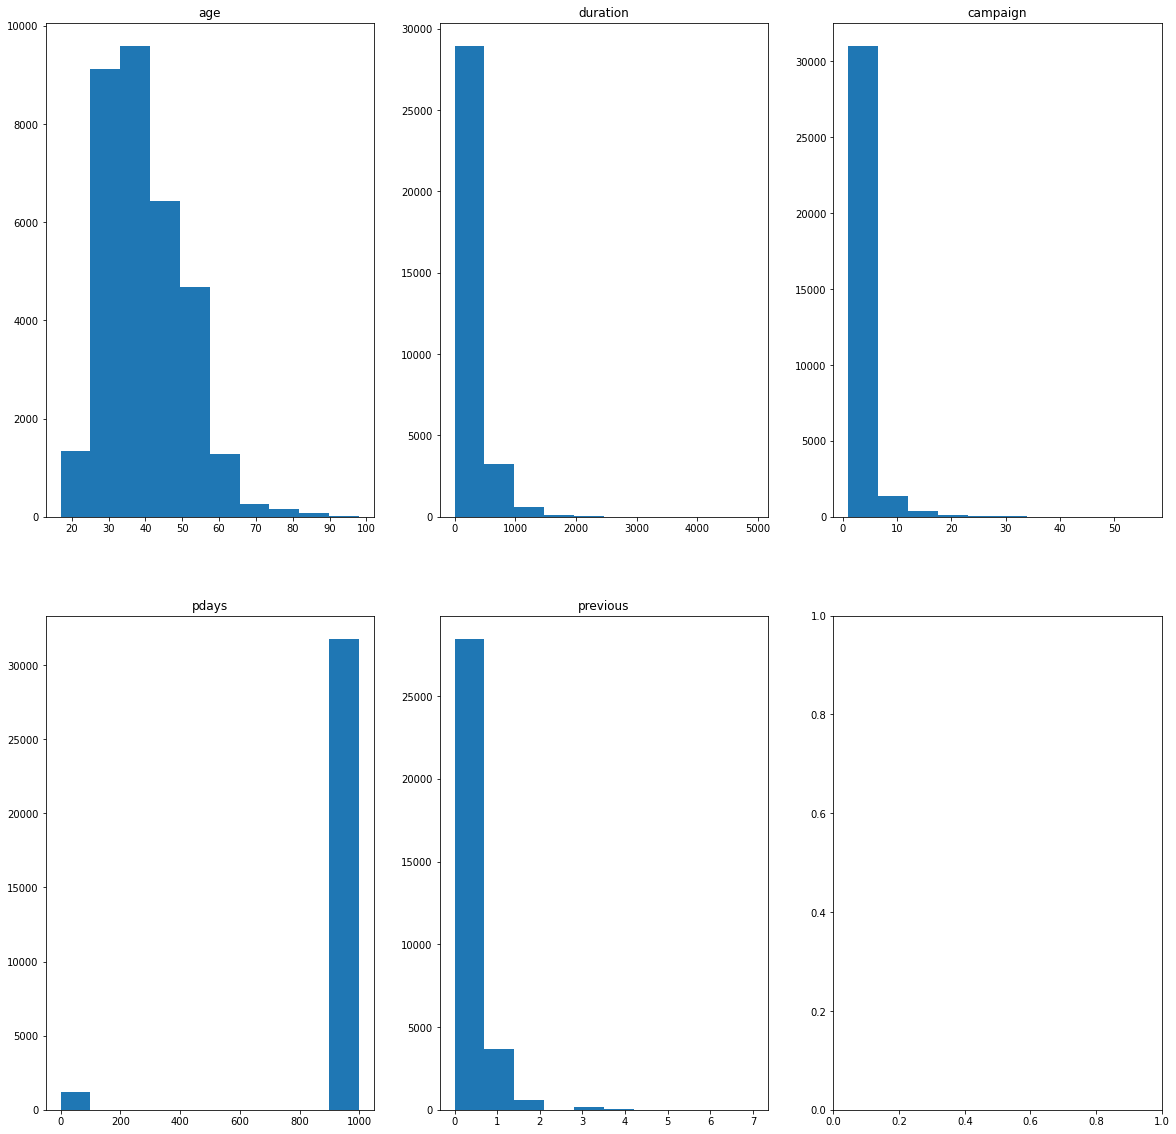

In [ ]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(2, 3, sharex = False, sharey = False, figsize = (15, 15))
counter = 0
for column in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    ax[trace_x, trace_y].hist(train[column])
    ax[trace_x, trace_y].set_title(column)

    counter += 1

plt.tight_layout()
plt.show()

In [ ]:
train['y'].value_counts(1)

0    0.887557
1    0.112443
Name: y, dtype: float64

The percentage of clients who declined the offer, and the percentage that accepted.

    Failure (0): 88.76%
    Success (1): 11.24%
It is infered that most of the time, a client is most likely to say 'NO'.

## **Random Guess**

In [ ]:
samp.Predicted = np.random.choice(range(2), size = samp.shape[0], p = [train['y'].value_counts(1)[0], train['y'].value_counts(1)[1]])

In [ ]:
samp.to_csv('Random_Prediction.csv', index = False)

# **Decision Tree**

*Rows with 'NULL' values can change the DT. Hence, removing the 'NULL' values.*

In [ ]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
train.dropna()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
1,35451,31,admin.,married,university.degree,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
2,30592,59,retired,married,basic.4y,no,no,no,cellular,may,...,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
3,17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
4,3315,39,admin.,single,high.school,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,6265,58,retired,married,professional.course,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
32946,11284,37,management,married,university.degree,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
32947,38158,35,admin.,married,high.school,no,yes,no,cellular,oct,...,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,1
32948,860,40,management,married,university.degree,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


* Some of the columns contain categorical 
variables, like job status and marital status. Unfortunately, the DT can't handle categorical varaibles.
* Dummy variables will create a new column for each category in the original column. Example, the marital column would be broken up into 3 new columns: Single, Married, and Divorced. A '1' in the Single column represents that the person is single, a '0' in the Married column represents that the person is not married, etc.



In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,12556,40,94,2,999,0,1.4,93.918,-42.7,4.960,...,0,0,0,1,0,0,0,0,1,0
1,35451,31,116,4,999,0,-1.8,92.893,-46.2,1.244,...,0,0,0,1,0,0,0,0,1,0
2,30592,59,13,6,999,1,-1.8,92.893,-46.2,1.354,...,0,0,0,1,0,0,0,1,0,0
3,17914,43,94,5,999,0,1.4,93.918,-42.7,4.961,...,0,0,0,0,0,1,0,0,1,0
4,3315,39,344,2,999,0,1.1,93.994,-36.4,4.860,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
train.columns

Index(['id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov'

In [ ]:
test.columns

Index(['id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'mont

In [ ]:
X = train.drop(columns = ['y', 'id', 'duration'])

In [ ]:
Y = train['y']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Adding an extra column in the testing data, 'default_yes'. It was missing from the test data.

In [ ]:
test = test.drop(columns = ['id', 'duration'])

In [ ]:
test['default_yes'] = 0

* A DT is created with maximum depth of 5. With more than 20 features (columns), the DT would grow very large.
* Having a large tree slows down the algorithm and becomes confusing, and can cause overfitting.

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
print('Training accuracy:', tree.score(X_train, Y_train))
print('Testing accuracy:', tree.score(X_test, Y_test))

Training accuracy: 0.9052731411229135
Testing accuracy: 0.8987860394537177


* Sorting the most important features based off of their 'Gain', or the weight given to each feature.
* Features with higher gain, impact higher

In [ ]:
pd.DataFrame({'Gain': tree.feature_importances_}, 
             index = X_train.columns).sort_values('Gain', ascending = False)

,Gain
nr.employed,0.626641
pdays,0.117199
cons.conf.idx,0.070712
euribor3m,0.039801
month_oct,0.031665
...,...
education_unknown,0.000000
default_no,0.000000
default_unknown,0.000000
default_yes,0.000000


# **Decision Tree with Bagging Classifier**

*A Bagging classifier is an ensemble meta-estimaotr that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction. Bagging reduces overfitting (variance) by averaging or voting, however, this leads to an increase in bias, which is compensated by the reduction in variance.*

* The classifier will run on a model 'n_estimators' times. Each time the classifier runs, it selects a percentage of the original data points, with replacment. All of the attempts are then averaged together.

In [ ]:
bag_model = BaggingClassifier(base_estimator = tree, n_estimators = 100, bootstrap = True)
bag_model = bag_model.fit(X_train, Y_train)

In [ ]:
y_pred = bag_model.predict(X_test)

In [ ]:
print('Training accuracy:', bag_model.score(X_train, Y_train))
print('Testing accuracy:', bag_model.score(X_test, Y_test))

Training accuracy: 0.9064491654021244
Testing accuracy: 0.9006069802731411


**Most important features**

In [ ]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag_model.estimators_], axis = 0)
pd.DataFrame({'Gain': tree.feature_importances_}, index = X_train.columns).sort_values('Gain', ascending = False)

,Gain
nr.employed,0.626641
pdays,0.117199
cons.conf.idx,0.070712
euribor3m,0.039801
month_oct,0.031665
...,...
education_unknown,0.000000
default_no,0.000000
default_unknown,0.000000
default_yes,0.000000


In [ ]:
predictions = pd.DataFrame(bag_model.predict(test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
samp['Predicted'] = predictions
samp.to_csv('DT.csv', index = False)

# **Logistic Regression**

In [ ]:
samp = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/samp_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/bank-test.csv')
train = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/bank-train.csv')

In [ ]:
train = train.drop(['default', 'id'], axis = 1)
test = test.drop(['default', 'id'], axis = 1)

In [ ]:
train.head()

In [ ]:
train = train.drop(['pdays', 'job_unknown', 'marital_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
test = test.drop(['pdays', 'job_unknown', 'marital_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)

In [ ]:
train.head()

,id,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,12556,40,94,2,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,1,0,0,0,0,1,0
1,35451,31,116,4,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,0,1,0
2,30592,59,13,6,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
3,17914,43,94,5,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
4,3315,39,344,2,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
train = train.replace({'no': 0, 'yes': 1})
test = test.replace({'no': 0, 'yes': 1})

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train.head()

,id,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,12556,40,94,2,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,1,0,0,0,0,1,0
1,35451,31,116,4,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,0,1,0
2,30592,59,13,6,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
3,17914,43,94,5,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
4,3315,39,344,2,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X = train.drop(columns = ['y', 'id', 'duration'])
y = train['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
X2_train = X
y2_train = y

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_test = pd.DataFrame(lr2.predict(test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# **Random Forest**

In [ ]:
forest = RandomForestClassifier(random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
forest_predictions = pd.Series(forest.predict(X_test))

In [ ]:
forest2 = RandomForestClassifier(random_state = 2)
forest2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=2)

In [ ]:
y_pred_test_2 = pd.Series(forest2.predict(test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
gain_df = pd.DataFrame({'Gain': forest2.feature_importances_}, index = X_train.columns).sort_values('Gain', ascending = False)
gain_df

,Gain
age,0.162926
euribor3m,0.121050
campaign,0.082354
nr.employed,0.055914
poutcome_success,0.036475
cons.conf.idx,0.026465
emp.var.rate,0.025500
housing_yes,0.022111
housing_no,0.021704
cons.price.idx,0.019821


In [ ]:
samp = pd.read_csv('/content/drive/MyDrive/Predicting Bank Telemarketing/samp_submission.csv')
samp.columns
index = samp['id']
ans = pd.concat([index, y_pred_test], axis = 1)
ans.rename(inplace = True, columns = {0: 'Predicted'})
print(ans)

         id  Predicted
0     32884          0
1      3169          0
2     32206          0
3      9403          0
4     14020          0
...     ...        ...
8233  12322          0
8234  23440          0
8235  29431          0
8236  16627          0
8237   1871          0

[8238 rows x 2 columns]


In [ ]:
samp.Predicted = ans
ans.to_csv('fifth_test.csv', index = False)

ValueError: ignored